# Data Cleaning 

#### 1. Import pandas library.

In [1]:
import pandas as pd

#### 2. Import pymysql and sqlalchemy as you have learnt in the lesson of importing/exporting data. 


In [2]:
import pymysql
from sqlalchemy import create_engine

#### 3. Create a mysql engine to set the connection to the server. Check the connection details in [this link](https://relational.fit.cvut.cz/dataset/Stats).

In [3]:
username='guest'
host='relational.fit.cvut.cz'
password='relational'
database_name='stats'
engine=create_engine(f"""mysql+pymysql://{username}:{password}@{host}/{database_name}""")

#### 4. Import the users table.

In [37]:
users=pd.read_sql_query('SELECT * FROM users', engine)


In [38]:
users.head()

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,Age,ProfileImageUrl
0,-1,1,2010-07-19 06:55:26,Community,2010-07-19 06:55:26,http://meta.stackexchange.com/,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",0,5007,1920,-1,NaN,None
1,2,101,2010-07-19 14:01:36,Geoff Dalgas,2013-11-12 22:07:23,http://stackoverflow.com,"Corvallis, OR",<p>Developer on the StackOverflow team. Find ...,25,3,0,2,37.0,None
2,3,101,2010-07-19 15:34:50,Jarrod Dixon,2014-08-08 06:42:58,http://stackoverflow.com,"New York, NY","<p><a href=""http://blog.stackoverflow.com/2009...",22,19,0,3,35.0,None
3,4,101,2010-07-19 19:03:27,Emmett,2014-01-02 09:31:02,http://minesweeperonline.com,"San Francisco, CA",<p>currently at a startup in SF</p>\n\n<p>form...,11,0,0,1998,28.0,http://i.stack.imgur.com/d1oHX.jpg
4,5,6792,2010-07-19 19:03:57,Shane,2014-08-13 00:23:47,http://www.statalgo.com,"New York, NY",<p>Quantitative researcher focusing on statist...,1145,662,5,54503,35.0,None


#### 5. Rename Id column to userId.

In [39]:
users=users.rename(columns={'Id':'UserId'})
users.head()

,UserId,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,Age,ProfileImageUrl
0,-1,1,2010-07-19 06:55:26,Community,2010-07-19 06:55:26,http://meta.stackexchange.com/,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",0,5007,1920,-1,NaN,None
1,2,101,2010-07-19 14:01:36,Geoff Dalgas,2013-11-12 22:07:23,http://stackoverflow.com,"Corvallis, OR",<p>Developer on the StackOverflow team. Find ...,25,3,0,2,37.0,None
2,3,101,2010-07-19 15:34:50,Jarrod Dixon,2014-08-08 06:42:58,http://stackoverflow.com,"New York, NY","<p><a href=""http://blog.stackoverflow.com/2009...",22,19,0,3,35.0,None
3,4,101,2010-07-19 19:03:27,Emmett,2014-01-02 09:31:02,http://minesweeperonline.com,"San Francisco, CA",<p>currently at a startup in SF</p>\n\n<p>form...,11,0,0,1998,28.0,http://i.stack.imgur.com/d1oHX.jpg
4,5,6792,2010-07-19 19:03:57,Shane,2014-08-13 00:23:47,http://www.statalgo.com,"New York, NY",<p>Quantitative researcher focusing on statist...,1145,662,5,54503,35.0,None


#### 6. Import the posts table. 

In [41]:
posts=pd.read_sql_query('SELECT * FROM posts', engine)
posts.head()


,Id,PostTypeId,AcceptedAnswerId,CreaionDate,Score,ViewCount,Body,OwnerUserId,LasActivityDate,Title,...,AnswerCount,CommentCount,FavoriteCount,LastEditorUserId,LastEditDate,CommunityOwnedDate,ParentId,ClosedDate,OwnerDisplayName,LastEditorDisplayName
0,1,1,15.0,2010-07-19 19:12:12,23,1278.0,<p>How should I elicit prior distributions fro...,8.0,2010-09-15 21:08:26,Eliciting priors from experts,...,5.0,1,14.0,NaN,NaT,NaT,NaN,NaT,None,None
1,2,1,59.0,2010-07-19 19:12:57,22,8198.0,<p>In many different statistical methods there...,24.0,2012-11-12 09:21:54,What is normality?,...,7.0,1,8.0,88.0,2010-08-07 17:56:44,NaT,NaN,NaT,None,None
2,3,1,5.0,2010-07-19 19:13:28,54,3613.0,<p>What are some valuable Statistical Analysis...,18.0,2013-05-27 14:48:36,What are some valuable Statistical Analysis op...,...,19.0,4,36.0,183.0,2011-02-12 05:50:03,2010-07-19 19:13:28,NaN,NaT,None,None
3,4,1,135.0,2010-07-19 19:13:31,13,5224.0,<p>I have two groups of data. Each with a dif...,23.0,2010-09-08 03:00:19,Assessing the significance of differences in d...,...,5.0,2,2.0,NaN,NaT,NaT,NaN,NaT,None,None
4,5,2,NaN,2010-07-19 19:14:43,81,NaN,"<p>The R-project</p>\n\n<p><a href=""http://www...",23.0,2010-07-19 19:21:15,None,...,NaN,3,NaN,23.0,2010-07-19 19:21:15,2010-07-19 19:14:43,3.0,NaT,None,None


#### 7. Rename Id column to postId and OwnerUserId to userId.

In [42]:
posts=posts.rename(columns={'Id':'postId','OwnerUserId':'UserId'})
posts.head()

,postId,PostTypeId,AcceptedAnswerId,CreaionDate,Score,ViewCount,Body,UserId,LasActivityDate,Title,...,AnswerCount,CommentCount,FavoriteCount,LastEditorUserId,LastEditDate,CommunityOwnedDate,ParentId,ClosedDate,OwnerDisplayName,LastEditorDisplayName
0,1,1,15.0,2010-07-19 19:12:12,23,1278.0,<p>How should I elicit prior distributions fro...,8.0,2010-09-15 21:08:26,Eliciting priors from experts,...,5.0,1,14.0,NaN,NaT,NaT,NaN,NaT,None,None
1,2,1,59.0,2010-07-19 19:12:57,22,8198.0,<p>In many different statistical methods there...,24.0,2012-11-12 09:21:54,What is normality?,...,7.0,1,8.0,88.0,2010-08-07 17:56:44,NaT,NaN,NaT,None,None
2,3,1,5.0,2010-07-19 19:13:28,54,3613.0,<p>What are some valuable Statistical Analysis...,18.0,2013-05-27 14:48:36,What are some valuable Statistical Analysis op...,...,19.0,4,36.0,183.0,2011-02-12 05:50:03,2010-07-19 19:13:28,NaN,NaT,None,None
3,4,1,135.0,2010-07-19 19:13:31,13,5224.0,<p>I have two groups of data. Each with a dif...,23.0,2010-09-08 03:00:19,Assessing the significance of differences in d...,...,5.0,2,2.0,NaN,NaT,NaT,NaN,NaT,None,None
4,5,2,NaN,2010-07-19 19:14:43,81,NaN,"<p>The R-project</p>\n\n<p><a href=""http://www...",23.0,2010-07-19 19:21:15,None,...,NaN,3,NaN,23.0,2010-07-19 19:21:15,2010-07-19 19:14:43,3.0,NaT,None,None


#### 8. Define new dataframes for users and posts with the following selected columns:
**users columns**: userId, Reputation, Views, UpVotes, DownVotes  
**posts columns**: postId, Score, userID, ViewCount, CommentCount

In [43]:
users2=users[['UserId', 'Reputation', 'Views', 'UpVotes', 'DownVotes']]
posts2=posts[['postId', 'Score', 'UserId', 'ViewCount', 'CommentCount']]

#### 9. Merge the new dataframes you have created, of users and posts. 
You will need to make an inner [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) of posts and users dataframes.

In [44]:
merged=users2.merge(posts2,how='inner', on='UserId')

In [ ]:
#on aurait pu faire
pd.merge(users,posts, on='UserId')

#### 10. How many missing values do you have in your merged dataframe? On which columns?

In [45]:
merged.isna().sum()/merged.shape[0]

UserId          0.000000
Reputation      0.000000
Views           0.000000
UpVotes         0.000000
DownVotes       0.000000
postId          0.000000
Score           0.000000
ViewCount       0.534267
CommentCount    0.000000
dtype: float64

In [46]:
#on veut comprendre nos données pour voir s'il y a un lien entre views et viewcount
merged.sample(5)

,UserId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
59266,20917,246,21,15,0,66192,4,1235.0,6
51043,13818,2594,137,70,0,101490,1,NaN,0
66469,26481,11,2,0,0,60839,2,168.0,2
12964,966,1290,137,244,0,3951,4,NaN,2
38201,8196,401,76,189,0,35386,4,718.0,3


In [48]:
#on cherche un echantillon pour lequel viewcount n'est pas nul
merged[merged.ViewCount>0].sample(5)

,UserId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
25342,4426,1912,336,126,1,60990,0,53.0,4
65774,26091,97,16,7,0,60078,2,113.0,0
73943,31611,245,28,5,0,101220,0,68.0,1
75889,35074,10,11,0,0,77851,0,209.0,1
49000,12752,387,21,26,4,92716,1,62.0,0


In [52]:
#on selecte les users qui ont des ViewCount nulles 
merged[merged.ViewCount.isna()].UserId

0           -1
1           -1
2           -1
3           -1
4           -1
         ...  
90518    55605
90521    55609
90528    55621
90536    55637
90575    55729
Name: UserId, Length: 48396, dtype: int64

In [53]:
merged.drop(merged[merged.UserId==-1].index)

,UserId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
211,5,6792,1145,662,5,6,152,29229.0,5
212,5,6792,1145,662,5,12,20,NaN,1
213,5,6792,1145,662,5,32,12,NaN,0
214,5,6792,1145,662,5,49,6,NaN,0
215,5,6792,1145,662,5,64,6,NaN,0
...,...,...,...,...,...,...,...,...,...
90579,55734,1,0,0,0,115352,0,16.0,0
90580,55738,11,0,0,0,115360,2,40.0,4
90581,55742,6,0,0,0,115366,1,17.0,0
90582,55744,6,1,0,0,115370,1,13.0,2


In [54]:
merged.drop(merged[merged.UserId==-1].index, inplace=True)

In [55]:
merged[merged.UserId==55605]

,UserId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
90518,55605,1,2,0,0,115106,0,NaN,0


In [51]:

merged[merged.ViewCount.isna()].UserId.nunique()

5959

In [50]:
#select the row from merged where viewcount is empty et on select column user_id pour voir la ffrequence des posts
#le id 805 has 1712 posts with missing counts
merged[merged.ViewCount.isna()].UserId.value_counts()

805      1712
686      1567
919      1200
11032     954
7290      821
         ... 
24833       1
37119       1
41209       1
27574       1
25622       1
Name: UserId, Length: 5959, dtype: int64

In [56]:
#user 805 has 1720 posts 
merged[merged.UserId==805].shape

(1720, 9)

In [57]:
merged[merged.UserId==805]

,UserId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
8724,805,65272,5680,7035,143,1425,11,NaN,3
8725,805,65272,5680,7035,143,1723,8,NaN,4
8726,805,65272,5680,7035,143,1724,5,NaN,0
8727,805,65272,5680,7035,143,2434,2,NaN,4
8728,805,65272,5680,7035,143,2589,2,NaN,0
...,...,...,...,...,...,...,...,...,...
10439,805,65272,5680,7035,143,115332,1,NaN,0
10440,805,65272,5680,7035,143,115337,1,NaN,0
10441,805,65272,5680,7035,143,115354,2,NaN,0
10442,805,65272,5680,7035,143,115374,2,NaN,2


In [58]:
#number of posts done by every user
merged.UserId.value_counts()

805      1720
686      1598
919      1204
11032     966
7290      827
         ... 
53048       1
42805       1
34609       1
32558       1
10654       1
Name: UserId, Length: 21982, dtype: int64

#### 11. You will need to make something with missing values.  Will you clean or filling them? Explain. 
**Remember** to check the results of your code before going to the next step.

# Dummies part

In [60]:
merged.ViewCount.isna()

211      False
212       True
213       True
214       True
215       True
         ...  
90579    False
90580    False
90581    False
90582    False
90583    False
Name: ViewCount, Length: 90373, dtype: bool

In [61]:
#on chnage le type de column en int
merged.ViewCount.isna().astype(int)

211      0
212      1
213      1
214      1
215      1
        ..
90579    0
90580    0
90581    0
90582    0
90583    0
Name: ViewCount, Length: 90373, dtype: int32

In [62]:
#on renome cette nouvelle colonne
merged['was missing']=merged.ViewCount.isna().astype(int)

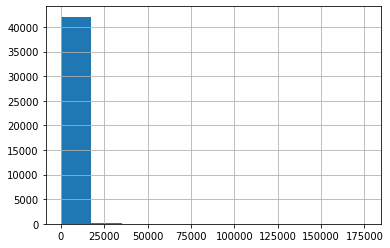

In [64]:
merged.ViewCount.hist()

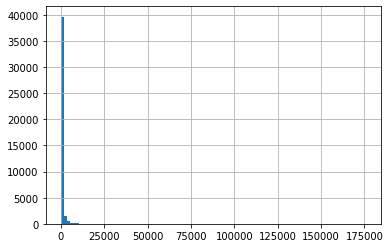

In [65]:
merged.ViewCount.hist(bins=100)

In [66]:
merged.ViewCount.fillna(0)

211      29229.0
212          0.0
213          0.0
214          0.0
215          0.0
          ...   
90579       16.0
90580       40.0
90581       17.0
90582       13.0
90583        5.0
Name: ViewCount, Length: 90373, dtype: float64

In [67]:
#je crois qu'on remplit les NA avec des 0
merged.ViewCount=merged.ViewCount.fillna(0)

In [68]:
merged.head()

,UserId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount,was missing
211,5,6792,1145,662,5,6,152,29229.0,5,0
212,5,6792,1145,662,5,12,20,0.0,1,1
213,5,6792,1145,662,5,32,12,0.0,0,1
214,5,6792,1145,662,5,49,6,0.0,0,1
215,5,6792,1145,662,5,64,6,0.0,0,1


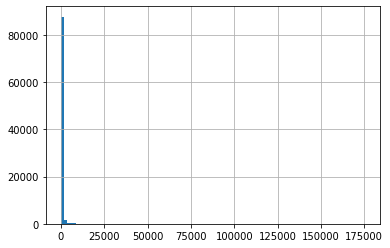

In [69]:
#on revisionne la distribution, le nombre de 0 a augmenté mais la distribution reste la meme
merged.ViewCount.hist(bins=100)

#### 12. Adjust the data types in order to avoid future issues. Which ones should be changed? 

In [70]:
#on affiche les datatypes
merged.dtypes

UserId            int64
Reputation        int64
Views             int64
UpVotes           int64
DownVotes         int64
postId            int64
Score             int64
ViewCount       float64
CommentCount      int64
was missing       int32
dtype: object

In [71]:
#on teste si on a encore des missing values
merged.isna().sum().sum()

0

In [72]:
#on change le type de données de la colonnes ViewCount with astype
merged.ViewCount=merged.ViewCount.astype(int)

In [73]:
merged.dtypes

UserId          int64
Reputation      int64
Views           int64
UpVotes         int64
DownVotes       int64
postId          int64
Score           int64
ViewCount       int32
CommentCount    int64
was missing     int32
dtype: object

In [76]:
merged.columns
merged.values
merged.index

Index(['UserId', 'Reputation', 'Views', 'UpVotes', 'DownVotes', 'postId',
       'Score', 'ViewCount', 'CommentCount', 'was missing'],
      dtype='object')

In [77]:
#changer l'ordre des colonnes
merged[['was missing','UserId', 'Reputation', 'Views', 'UpVotes', 'DownVotes', 'postId',
       'Score', 'ViewCount', 'CommentCount']]

,was missing,UserId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
211,0,5,6792,1145,662,5,6,152,29229,5
212,1,5,6792,1145,662,5,12,20,0,1
213,1,5,6792,1145,662,5,32,12,0,0
214,1,5,6792,1145,662,5,49,6,0,0
215,1,5,6792,1145,662,5,64,6,0,0
...,...,...,...,...,...,...,...,...,...,...
90579,0,55734,1,0,0,0,115352,0,16,0
90580,0,55738,11,0,0,0,115360,2,40,4
90581,0,55742,6,0,0,0,115366,1,17,0
90582,0,55744,6,1,0,0,115370,1,13,2


In [78]:
merged.iloc[:,::-1]

,was missing,CommentCount,ViewCount,Score,postId,DownVotes,UpVotes,Views,Reputation,UserId
211,0,5,29229,152,6,5,662,1145,6792,5
212,1,1,0,20,12,5,662,1145,6792,5
213,1,0,0,12,32,5,662,1145,6792,5
214,1,0,0,6,49,5,662,1145,6792,5
215,1,0,0,6,64,5,662,1145,6792,5
...,...,...,...,...,...,...,...,...,...,...
90579,0,0,16,0,115352,0,0,0,1,55734
90580,0,4,40,2,115360,0,0,0,11,55738
90581,0,0,17,1,115366,0,0,0,6,55742
90582,0,2,13,1,115370,0,0,1,6,55744


In [79]:
#select specific rows 
merged[(merged.Reputation>1000)]

,UserId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount,was missing
211,5,6792,1145,662,5,6,152,29229,5,0
212,5,6792,1145,662,5,12,20,0,1,1
213,5,6792,1145,662,5,32,12,0,0,1
214,5,6792,1145,662,5,49,6,0,0,1
215,5,6792,1145,662,5,64,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...
88637,52554,2294,192,59,3,115029,0,0,1,1
88638,52554,2294,192,59,3,115062,2,0,0,1
88639,52554,2294,192,59,3,115177,3,0,0,1
88640,52554,2294,192,59,3,115179,1,0,0,1


In [80]:
#select specifi rows and specific colonnes (on ajoute loc, ca pourrait marcher sans mais ca permet d'appliquer des changements etc)
merged.loc[(merged.Reputation>1000),['postId','was_missing']]

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,postId,was_missing
211,6,NaN
212,12,NaN
213,32,NaN
214,49,NaN
215,64,NaN
...,...,...
88637,115029,NaN
88638,115062,NaN
88639,115177,NaN
88640,115179,NaN


In [81]:
#on remplace toutes les valeurs de view count par 1000 pour les lignes dt reputation >1000 et was missing =1
merged.loc[(merged.Reputation>1000)&(merged['was_missing']==1),'ViewCount']==1000

KeyError: 'was_missing'